In [16]:
%matplotlib inline
import matplotlib.pyplot as p

from sympy import *
import scipy as sc
init_printing() # for pretty-printing equations etc

# defining variables
x = var('x')
type(x) # check its class: symbolic var

a, b, c = var("a, b, c") # multiple at once

## add constraints to our symbolic vars
x = var('x', real=True)
x.is_imaginary # no

x = Symbol('x', positive=True)
x > 0 # true
x < 0 # false

In [17]:
## symbolic eqns
MyFun = (pi + x)**2; MyFun

In [10]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


In [11]:
# numerical evaluation
pi.evalf(n=100) # pi to a 100 places after decimal!

In [12]:
N(pi, 50) #N() is shorthand for evalf()

In [19]:
# evaluating fn
N(MyFun, 5) # output is just MyFun to 5dp, but it's changed its form a bit

In [20]:
# sub in values
MyFun.subs(x, 1.5) # sub x with 1.5

In [21]:
MyFun.subs(x, a+pi)

In [22]:
# assign this as a new symbolic eqn for later use
MyFun_new = MyFun.subs(x, a+pi); MyFun_new

In [26]:
# evaluate fn over a range of values: use numpy arrrays
x_vec = sc.arange(0, 10, 0.1); x_vec # from 0 to 10 w 0.1 interval

/tmp/ipykernel_134115/2033240119.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x_vec = sc.arange(0, 10, 0.1); x_vec


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [27]:
MyFun_vec = sc.array([N(MyFun.subs(x, xx)) for xx in x_vec]) # uses a list comprehension
# make an array of the outputs of myfun on all of xvec

/tmp/ipykernel_134115/1026011908.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  MyFun_vec = sc.array([N(MyFun.subs(x, xx)) for xx in x_vec]) # uses a list comprehension


In [30]:
MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec])

/tmp/ipykernel_134115/3847648917.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec])


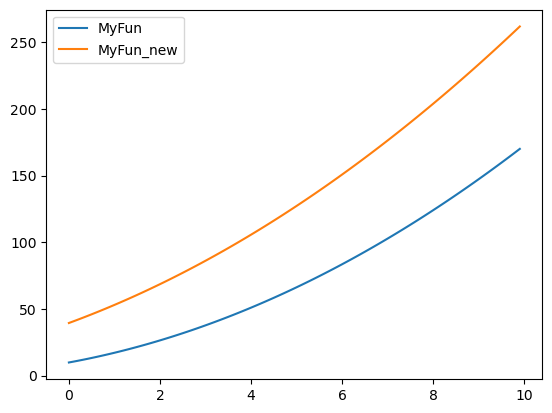

In [32]:
fig, ax = p.subplots()
ax.plot(x_vec, MyFun_vec, label = 'MyFun')
ax.plot(x_vec, MyFun_new_vec, label = 'MyFun_new')
ax.legend()

In [42]:
#using evalf() or N() is slow
#lambdify() 'compiles' a sympy expression into a fn = efficient
MyFun_lamb = lambdify([x], MyFun, 'numpy')
    # first arg (x) is the variables that MyFun_lamb will be a fn of
    # now we can directly pass a numpy array:
MyFun_vec = MyFun_lamb(x_vec)

In [45]:
%%timeit
MyFun_vec = sc.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

<magic-timeit>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


9.69 ms ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%%timeit
MyFun_vec = MyFun_lamb(x_vec)

1.64 µs ± 55.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
